In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import os

def get_filenames(folder_path):
    filenames = []
    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):
            filenames.append(filename)
    return filenames

# 使用示例
folder_path = 'motion_data/'  # 替换成你的文件夹路径
file_list = get_filenames(folder_path)

file_list.sort()
file_list

['3_time_jumps.txt']

In [3]:
import os

def read_files_to_dataframes(folder_path):
    dataframes = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            # 读取CSV文件
            df = pd.read_csv(file_path, sep='\t')
            data = pd.DataFrame()
            data[['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)', 'ang_X(g)', 'ang_Y(g)', 'ang_Z(g)', 'Time']] = df[['加速度X(g)', '加速度Y(g)', '加速度Z(g)',
                                                                     '角速度X(°/s)', '角速度Y(°/s)','角速度Z(°/s)', '时间']]
            data['Time'] = pd.to_datetime(data['Time'], format='%Y-%m-%d %H:%M:%S:%f')
            # 将DataFrame存储在以文件名为键的字典中
            dataframes[filename] = data
    return dataframes

# 使用示例
folder_path = 'motion_data'  # 替换成你的文件夹路径
dfs = read_files_to_dataframes(folder_path)

# 打印每个DataFrame的信息（可选）
for filename, df in dfs.items():
    filename = filename[0:12]
    print(f"Data from {filename}:")
    print(df.head())  # 打印每个DataFrame的前几行

Data from 3_time_jumps:
   acc_X(g)  acc_Y(g)  acc_Z(g)  ang_X(g)  ang_Y(g)  ang_Z(g)  \
0    -0.678     0.365     0.646     0.488     0.000    -1.160   
1    -0.678     0.365     0.646     0.488     0.000    -1.160   
2    -0.688     0.354     0.650     1.099    -0.305    -1.343   
3    -0.688     0.354     0.650     1.099    -0.305    -1.343   
4    -0.670     0.356     0.642     1.770    -0.183    -1.343   

                     Time  
0 2024-01-16 21:15:37.867  
1 2024-01-16 21:15:37.867  
2 2024-01-16 21:15:37.997  
3 2024-01-16 21:15:37.997  
4 2024-01-16 21:15:38.710  


Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...


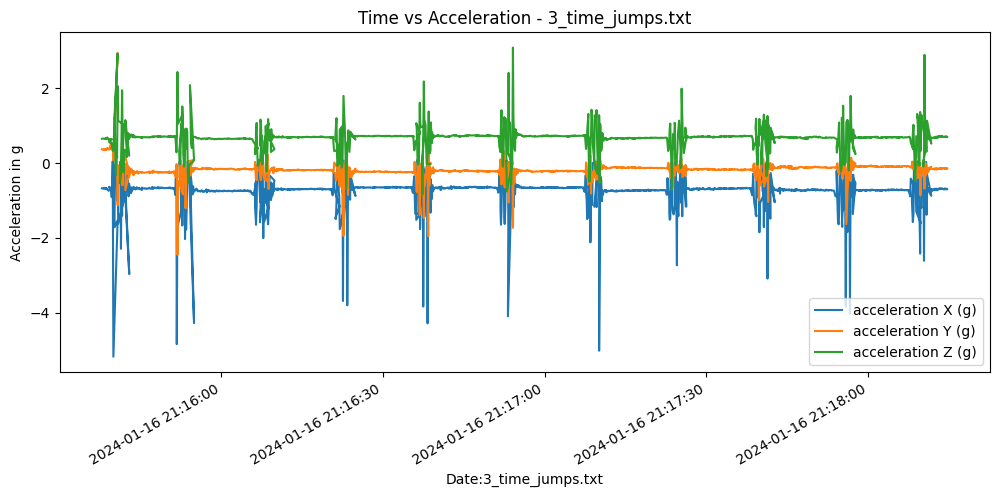

In [4]:
for filename, df in dfs.items():
    

    print(f"Plotting data from {filename}...")

    plt.figure(figsize=(12, 5))

    print(f"Plotting data from {filename}...")

    # 绘制每个加速度分量

    plt.plot(df['Time'], df['acc_X(g)'], label='acceleration X (g)')
    plt.plot(df['Time'], df['acc_Y(g)'], label='acceleration Y (g)')
    plt.plot(df['Time'], df['acc_Z(g)'], label='acceleration Z (g)')
    #plt.plot(df['Time'], df['ang_X(g)'], label='angular_velocity X (g)')
    #plt.plot(df['Time'], df['ang_Y(g)'], label='angular_velocity Y (g)')
    #plt.plot(df['Time'], df['ang_Z(g)'], label='angular_velocity Z (g)')

    print(f"Plotting data from {filename}...")

    # 格式化图表
    plt.xlabel('Date:' + filename)
    plt.ylabel('Acceleration in g')
    plt.title(f'Time vs Acceleration - {filename}')
    plt.legend()
    plt.grid(False)

    print(f"Plotting data from {filename}...")

    # 改进日期格式化
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.show()

In [6]:
data = dfs['3_time_jumps.txt']

In [5]:
# 定义时间窗口大小和步长（例如：1秒窗口，0.5秒步长）
# 这需要根据你的数据的时间单位来调整
window_size = 10  # 假设每秒有100个数据点
step_size = 5     # 每50个数据点提取一次

In [ ]:
# 初始化特征和标签列表
features = data[['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)', 'ang_X(g)', 'ang_Y(g)', 'ang_Z(g)', 'Time']]
labels = []  # 如果有标签的话

# 划分时间窗口并提取特征
for start in range(0, data.shape[0] - window_size, step_size):
    end = start + window_size
    window = data.iloc[start:end]

    # 计算窗口内的统计特征
    feature = {
        'mean_x': window['acc_x'].mean(),
        'std_x': window['acc_x'].std(),
        'max_x': window['acc_x'].max(),
        'min_x': window['acc_x'].min(),
        # ...可以为y和z轴添加更多特征
    }
    features.append(feature)
    # 如果有标签的话，也可以在这里添加标签

# 将特征转换为适合机器学习模型的格式
features_df = pd.DataFrame(features)